In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
from features.titanic_feature_builder import TitanicFeatureBuilder

In [3]:
titanic = TitanicFeatureBuilder(pd.read_csv('Titanic.csv'))

In [4]:
titanic.df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.df['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

## Sex to male

In [7]:
titanic.sex_to_male()
titanic.df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


## Embarked encode

In [8]:
print(titanic.df['Embarked'].unique())
print(titanic.df['Embarked'].value_counts())
titanic.fill_embarked()
print(titanic.df['Embarked'].unique())
print(titanic.df['Embarked'].value_counts())

['S' 'C' 'Q' nan]
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
['S' 'C' 'Q']
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [9]:
# ендокінг в hot-endoding без dummy-trap
titanic.encode_embarked()
titanic.df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


# Add missing (без embarked)

In [10]:
titanic.add_missing()
titanic.df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Male               0
Embarked_Q         0
Embarked_S         0
Age_missing        0
Cabin_missing      0
dtype: int64

# Name to status

In [11]:
# Бачимо що всі значення мають певний патерн, де можна побачити статус між , та .
# Одна запись з графинею не відповідає цьому патерну, для неї застосуємо додатковий патеррн
titanic.df['Name'].value_counts().head()

Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
Name: count, dtype: int64

In [12]:
titanic.add_status_by_name()
titanic.df.Status.value_counts()
# Спробуємо поділити статуси по тутулу/ролі на такі групи:
# діти, цивільні, еліта(титульні), special (екіпаж, або військові. Доктори не входять в категорію, бо: 
# 1. Не має інформації доктори наук чи звичайні 
# 2. За інформацією, під час удару не було травм для людей та під час затоплення допомога докторів 
# не така значуща, тому вони діють як цивільні)

Status
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [13]:
titanic.add_role_by_status()
survival_rates = titanic.df.groupby("Role").agg(Survived=('Survived', 'mean')).reset_index()
fig = px.histogram(survival_rates, x="Role", y="Survived", histnorm="probability")
fig.show()
# Розподіл показує, що діти та еліта мали більше шанс вижити

In [14]:
titanic.encode_role()
titanic.df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Male,Embarked_Q,Embarked_S,Age_missing,Cabin_missing,Status,Role_elite,Role_kid,Role_special
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,0,1,Mr,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0,Mrs,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,1,Miss,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,0,0,Mrs,0,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1,0,1,Mr,0,0,0


# Fill age by median

In [15]:
titanic.df.groupby(['Status']).aggregate(mean_age=('Age', 'median'))

,mean_age
Status,
Capt,70.0
Col,58.0
Countess,33.0
Don,40.0
Dr,46.5
Jonkheer,38.0
Lady,48.0
Major,48.5
Master,3.5


In [16]:
titanic.fill_age()
titanic.df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Male,Embarked_Q,Embarked_S,Age_missing,Cabin_missing,Status,Role_elite,Role_kid,Role_special
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,0,1,Mr,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0,Mrs,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,1,Miss,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,0,0,Mrs,0,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1,0,1,Mr,0,0,0


In [17]:
titanic.df['Age'].isnull().sum()

np.int64(0)

<Axes: >

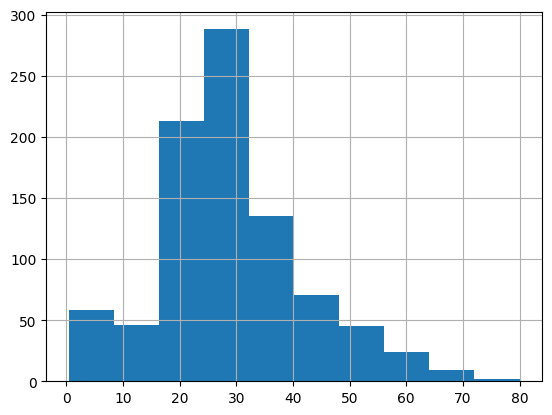

In [18]:
titanic.df['Age'].hist()

# Cabin

In [19]:
print(titanic.df['Cabin'].value_counts())
print(titanic.df['Cabin'].isnull().sum())

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64
687


## Каюту можна спробувати заповнити за номером класу, для цього спочатку продивимость всі значення кают

In [20]:
titanic.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Age            891 non-null    float64
 5   SibSp          891 non-null    int64  
 6   Parch          891 non-null    int64  
 7   Ticket         891 non-null    object 
 8   Fare           891 non-null    float64
 9   Cabin          204 non-null    object 
 10  Male           891 non-null    int64  
 11  Embarked_Q     891 non-null    int8   
 12  Embarked_S     891 non-null    int8   
 13  Age_missing    891 non-null    int8   
 14  Cabin_missing  891 non-null    int8   
 15  Status         891 non-null    object 
 16  Role_elite     891 non-null    int8   
 17  Role_kid       891 non-null    int8   
 18  Role_speci

In [21]:
titanic.split_cabins()
titanic.df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_Q,Embarked_S,Age_missing,Cabin_missing,Status,Role_elite,Role_kid,Role_special,Deck,Room
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,...,0,1,0,1,Mr,0,0,0,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,0,0,0,0,Mrs,0,0,0,C,85
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,1,0,1,Miss,0,0,0,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,0,1,0,0,Mrs,0,0,0,C,123
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,...,0,1,0,1,Mr,0,0,0,NaN,NaN


In [22]:
','.join(titanic.df.query('Pclass == 1').loc[:, 'Cabin'].dropna().drop_duplicates().astype(str))

'C85,C123,E46,C103,A6,C23 C25 C27,B78,D33,B30,C52,B28,C83,E31,A5,D10 D12,D26,C110,B58 B60,D47,B86,C2,E33,B19,A7,C49,A32,B4,B80,A31,D36,D15,C93,C78,D35,C87,B77,E67,B94,C125,C99,C118,D7,A19,B49,C22 C26,C106,C65,E36,C54,B57 B59 B63 B66,C7,E34,C32,B18,C124,C91,E40,T,C128,D37,B35,E50,C82,B96 B98,E44,A34,C104,C111,C92,E38,D21,E12,E63,A14,B37,C30,D20,B79,E25,D46,B73,C95,B38,B39,B22,C86,C70,A16,C101,C68,A10,E68,B41,A20,D19,D50,D9,A23,B50,A26,D48,E58,C126,B71,B51 B53 B55,D49,B5,B20,C62 C64,E24,C90,C45,E8,B101,D45,C46,D30,D11,B3,D6,B82 B84,D17,A36,B102,B69,E49,C47,D28,E17,A24,C50,B42,C148'

In [23]:
','.join(titanic.df.query('Pclass == 2').loc[:, 'Cabin'].dropna().drop_duplicates().astype(str))

'D56,F33,E101,F2,F4,D,E77'

In [24]:
','.join(titanic.df.query('Pclass == 3').loc[:, 'Cabin'].dropna().drop_duplicates().astype(str))

'G6,F G73,F E69,E10,F G63,E121,F38'

In [25]:
fig = px.histogram(titanic.df, x="Pclass", color="Deck")
fig.show()

In [26]:
# Бачимо, що: 
# E є в усіх класах, 
# D є в 1 та 2 класі
# F є в 2 та 3 класі

# A, B, C, T тільки в 1 класу,     оскільки кілька варіантів, заповніти не вийде
# G тільки в 3 класу, тому спробуємо заповнювати,            малий приріст інформації

# Можна спробувати знайти закономірність між ціною та палублю

In [27]:
fig = px.histogram(titanic.df, x="Fare", color="Deck", nbins=10)
fig.show()

# Як результат, бачимо, що немає чіткої закономірності між ціною квитка та палубою, отже позначимо всі невідомі палуби як unknown
# Палуба T має лише 1 елемент, тому спочатку подивимость на цей елемент

In [28]:
# Чогось особливого в елементу немає, оскільки елемент 1 з такою палубою кинемо каюту в unknown
titanic.df.query('Deck == "T"')

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_Q,Embarked_S,Age_missing,Cabin_missing,Status,Role_elite,Role_kid,Role_special,Deck,Room
339,340,0,1,"Blackwell, Mr. Stephen Weart",45.0,0,0,113784,35.5,T,...,0,1,0,0,Mr,0,0,0,T,NaN


In [29]:
titanic.fill_decks()
titanic.df['Deck'].value_counts()

Deck
unknown    688
C           59
B           47
D           33
E           32
A           15
F           13
G            4
Name: count, dtype: int64

In [30]:
titanic.encode_decks()
titanic.df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Role_kid,Role_special,Room,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_unknown
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,NaN,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,0,0,85,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,NaN,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,0,0,123,0,1,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,...,0,0,NaN,0,0,0,0,0,0,1


# Age та Fare to bins

In [31]:
fig = px.histogram(titanic.df, x="Age", color="Survived", nbins=20)
fig.show()

In [32]:
titanic.add_bins_age(drop_old=True)
titanic.df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Role_special,Room,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_unknown,Age_bins
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,...,0,NaN,0,0,0,0,0,0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,0,85,0,1,0,0,0,0,0,6
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,NaN,0,0,0,0,0,0,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,0,123,0,1,0,0,0,0,0,6
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,...,0,NaN,0,0,0,0,0,0,1,6


# Нормалізація Age та Fare

In [33]:
fig = px.histogram(titanic.df, x="Fare", color="Survived", nbins=10)
fig.show()

In [34]:
titanic.add_bins_fare(drop_old=True)
titanic.df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Room,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_unknown,Age_bins,Fare_bins
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,...,NaN,0,0,0,0,0,0,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,85,0,1,0,0,0,0,0,6,8
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,NaN,0,0,0,0,0,0,1,3,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,123,0,1,0,0,0,0,0,6,8
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,...,NaN,0,0,0,0,0,0,1,6,2


# Для алгоритму k-means важлива нормалізація

In [35]:
titanic.normalize_age()
titanic.df['Age'].describe()

count    891.000000
mean       0.364039
std        0.166692
min        0.000000
25%        0.258608
50%        0.371701
75%        0.434531
max        1.000000
Name: Age, dtype: float64

In [36]:
titanic.normalize_fare()
titanic.df['Fare'].describe()

count    891.000000
mean       0.062858
std        0.096995
min        0.000000
25%        0.015440
50%        0.028213
75%        0.060508
max        1.000000
Name: Fare, dtype: float64

# Що можна зробити ще

In [37]:
# PessengerId, Name, Ticker мають високу ентропію, можна викинути
# Cabin має багату кількість важко відновлених даних
# Room має глибокий зв'язок з Deck, кімната більш поточнує локацію людини, але через занадто багату
# кількість важковідновлених даних скіпну фічу

# з SibSp та Parch можна вижати корисну інформацію про знаходження родин поряд

titanic.df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Room,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_unknown,Age_bins,Fare_bins
0,1,0,3,"Braund, Mr. Owen Harris",0.271174,1,0,A/5 21171,0.014151,NaN,...,NaN,0,0,0,0,0,0,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.472229,1,0,PC 17599,0.139136,C85,...,85,0,1,0,0,0,0,0,6,8
2,3,1,3,"Heikkinen, Miss. Laina",0.321438,0,0,STON/O2. 3101282,0.015469,NaN,...,NaN,0,0,0,0,0,0,1,3,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.434531,1,0,113803,0.103644,C123,...,123,0,1,0,0,0,0,0,6,8
4,5,0,3,"Allen, Mr. William Henry",0.434531,0,0,373450,0.015713,NaN,...,NaN,0,0,0,0,0,0,1,6,2


# FamilySize (аріфметика)

In [38]:
titanic.add_family_size()
titanic.df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_unknown,Age_bins,Fare_bins,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0.271174,1,0,A/5 21171,0.014151,NaN,...,0,0,0,0,0,0,1,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.472229,1,0,PC 17599,0.139136,C85,...,0,1,0,0,0,0,0,6,8,1
2,3,1,3,"Heikkinen, Miss. Laina",0.321438,0,0,STON/O2. 3101282,0.015469,NaN,...,0,0,0,0,0,0,1,3,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.434531,1,0,113803,0.103644,C123,...,0,1,0,0,0,0,0,6,8,1
4,5,0,3,"Allen, Mr. William Henry",0.434531,0,0,373450,0.015713,NaN,...,0,0,0,0,0,0,1,6,2,0


In [39]:
fig = px.histogram(titanic.df, x="SibSp", color="Survived")
fig.show()

In [40]:
survival_rates = titanic.df.groupby("SibSp").agg(Survived=('Survived', 'mean')).reset_index()
fig = px.bar(survival_rates, x="SibSp", y="Survived")
fig.show()

# Створимо фічі Alone, Small family(1-2) та Big family(3+)

In [41]:
titanic.split_family_size()
titanic.df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_unknown,Age_bins,Fare_bins,FamilySize_Small,FamilySize_Big
0,1,0,3,"Braund, Mr. Owen Harris",0.271174,1,0,A/5 21171,0.014151,NaN,...,0,0,0,0,0,1,2,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.472229,1,0,PC 17599,0.139136,C85,...,1,0,0,0,0,0,6,8,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0.321438,0,0,STON/O2. 3101282,0.015469,NaN,...,0,0,0,0,0,1,3,2,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.434531,1,0,113803,0.103644,C123,...,1,0,0,0,0,0,6,8,1,0
4,5,0,3,"Allen, Mr. William Henry",0.434531,0,0,373450,0.015713,NaN,...,0,0,0,0,0,1,6,2,0,0


## SibSp

In [42]:
titanic.df['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [43]:
fig = px.histogram(titanic.df, x="SibSp", color="Survived")
fig.show()
# На гістограми бачимо, що від біна 4 до 8 надто висока смертність, але в цій області
# надто мало даних
# досліджу більш детально розподіл від 1 до 8

In [44]:
survival_rates = titanic.df.groupby("SibSp").agg(Survived=('Survived', 'mean')).reset_index()
fig = px.bar(survival_rates, x="SibSp", y="Survived")
fig.show()
# Розподіл досить нерівномірний, тому зроблю хот енкодінг на: 0, 1, 2, 3, 4 та все що більше 4 буде в 4

In [45]:
titanic.encode_sibSp()
titanic.df.head()

,PassengerId,Survived,Pclass,Name,Age,Parch,Ticket,Fare,Cabin,Male,...,Deck_G,Deck_unknown,Age_bins,Fare_bins,FamilySize_Small,FamilySize_Big,SibSp_1,SibSp_2,SibSp_3,SibSp_4
0,1,0,3,"Braund, Mr. Owen Harris",0.271174,0,A/5 21171,0.014151,NaN,1,...,0,1,2,0,1,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.472229,0,PC 17599,0.139136,C85,0,...,0,0,6,8,1,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0.321438,0,STON/O2. 3101282,0.015469,NaN,0,...,0,1,3,2,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.434531,0,113803,0.103644,C123,0,...,0,0,6,8,1,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",0.434531,0,373450,0.015713,NaN,1,...,0,1,6,2,0,0,0,0,0,0


## Parch

In [46]:
# Такий же принцип

In [47]:
titanic.df['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [48]:
fig = px.histogram(titanic.df, x="Parch", color="Survived")
fig.show()

In [49]:
survival_rates = titanic.df.groupby("Parch").agg(Survived=('Survived', 'mean')).reset_index()
fig = px.bar(survival_rates, x="Parch", y="Survived")
fig.show()
# в людей з дітьми досить великий шанс вижити, можливо це реклама демографії від творця датасету, але
# сумніваюсь
# в бінах 3 - 6 досить мало значень та важко сказати як точно вони заповнювались, бо бін 6 має 
# n записів 1, бін 5 має 5, а бін 4 має 4 записи. Скоріше за все, бін 6 - помилка запису
# Тому в цей раз через досить велику різницю даних між тими хто має дітей та тими, хто не має
# Я зроблю фічу child-parent

In [50]:
titanic.parch_to_child_parent()
titanic.df.head()

,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,Cabin,Male,Embarked_Q,...,Deck_unknown,Age_bins,Fare_bins,FamilySize_Small,FamilySize_Big,SibSp_1,SibSp_2,SibSp_3,SibSp_4,Child_Parent
0,1,0,3,"Braund, Mr. Owen Harris",0.271174,A/5 21171,0.014151,NaN,1,0,...,1,2,0,1,0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.472229,PC 17599,0.139136,C85,0,0,...,0,6,8,1,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0.321438,STON/O2. 3101282,0.015469,NaN,0,0,...,1,3,2,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.434531,113803,0.103644,C123,0,0,...,0,6,8,1,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",0.434531,373450,0.015713,NaN,1,0,...,1,6,2,0,0,0,0,0,0,0


In [51]:
titanic.df['Child_Parent'].value_counts()

Child_Parent
0    678
1    213
Name: count, dtype: int64

# Кореляція

In [52]:
titanic.df.corr(numeric_only=True) 
# Cabin_missing досить корельована з Pclass(0.725) та з Deck_unknown(0.966), викину її
# Fare_bins досить корельован з Pclass(0.69), Fare(0.62) та Deck_unknown(0.72), викину Pclass та Fare
# Age_bins корелює з Age, викину Age
# SibSp_1 корелює з FamilySize_Small(0.68), викину SibSp_1
# Також викину де-які інфі високоентропійні х-ки

,PassengerId,Survived,Pclass,Age,Fare,Male,Embarked_Q,Embarked_S,Age_missing,Cabin_missing,...,Deck_unknown,Age_bins,Fare_bins,FamilySize_Small,FamilySize_Big,SibSp_1,SibSp_2,SibSp_3,SibSp_4,Child_Parent
PassengerId,1.000000,-0.005007,-0.035144,0.042895,0.012658,0.042939,-0.033606,0.022204,-0.020167,-0.019919,...,-0.021056,0.052495,-0.010714,-0.048780,-0.019381,-0.013501,-0.023510,-0.065421,-0.035198,0.005167
Survived,-0.005007,1.000000,-0.338481,-0.078816,0.257307,-0.543351,0.003650,-0.149683,-0.092197,-0.316912,...,-0.319572,-0.037454,0.323875,0.238059,-0.029945,0.173076,0.029796,-0.037215,-0.108945,0.147408
Pclass,-0.035144,-0.338481,1.000000,-0.354005,-0.549500,0.131900,0.221009,0.074053,0.172933,0.725541,...,0.722607,-0.358474,-0.698107,-0.209584,0.097196,-0.166435,0.010455,0.041082,0.154441,-0.027526
Age,0.042895,-0.078816,-0.354005,1.000000,0.097944,0.104820,-0.062830,0.003542,-0.046798,-0.243755,...,-0.241026,0.947814,0.101707,-0.012226,-0.278737,0.017355,-0.085606,-0.150918,-0.256812,-0.276276
Fare,0.012658,0.257307,-0.549500,0.097944,1.000000,-0.182333,-0.117216,-0.162184,-0.100707,-0.482075,...,-0.482732,0.117161,0.626275,0.178945,0.169729,0.133121,0.070901,0.099936,0.041170,0.237717
Male,0.042939,-0.543351,0.131900,0.104820,-0.182333,1.000000,-0.074115,0.119224,0.055215,0.140391,...,0.142608,0.085140,-0.262920,-0.223105,-0.154624,-0.179339,-0.042182,-0.094850,0.007455,-0.247523
Embarked_Q,-0.033606,0.003650,0.221009,-0.062830,-0.117216,-0.074115,1.000000,-0.499421,0.337413,0.129572,...,0.128973,-0.085436,-0.206823,-0.067679,-0.037780,-0.066568,0.013285,-0.041590,0.031166,-0.097467
Embarked_S,0.022204,-0.149683,0.074053,0.003542,-0.162184,0.119224,-0.499421,1.000000,-0.241480,0.101139,...,0.102962,0.012170,-0.053088,-0.091935,0.091494,-0.038742,-0.018741,0.083277,0.059213,0.032821
Age_missing,-0.020167,-0.092197,0.172933,-0.046798,-0.100707,0.055215,0.337413,-0.241480,1.000000,0.144111,...,0.143028,-0.041677,-0.171106,-0.131026,-0.047165,-0.103021,-0.041313,0.017402,0.016225,-0.147163
Cabin_missing,-0.019919,-0.316912,0.725541,-0.243755,-0.482075,0.140391,0.129572,0.101139,0.144111,1.000000,...,0.996821,-0.248004,-0.539214,-0.203710,0.051471,-0.133319,0.006289,0.013342,0.101718,-0.089136


In [53]:
titanic.drop_irrelevant()
titanic.df.head()

,Survived,Male,Embarked_Q,Embarked_S,Age_missing,Role_elite,Role_kid,Role_special,Deck_B,Deck_C,...,Deck_G,Deck_unknown,Age_bins,Fare_bins,FamilySize_Small,FamilySize_Big,SibSp_2,SibSp_3,SibSp_4,Child_Parent
0,0,1,0,1,0,0,0,0,0,0,...,0,1,2,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,6,8,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,1,3,2,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,1,...,0,0,6,8,1,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,1,6,2,0,0,0,0,0,0


In [54]:
testtitanic = TitanicFeatureBuilder(pd.read_csv('Titanic_test.csv'))
testtitanic.build_by_template().head()

,Age_missing,Fare_missing,Male,Embarked_Q,Embarked_S,Role_elite,Role_kid,Role_other,Role_special,Deck_B,...,Deck_G,Deck_unknown,Age_bins,Fare_bins,FamilySize_Small,FamilySize_Big,SibSp_2,SibSp_3,SibSp_4,Child_Parent
0,0,0,1,1,0,0,0,0,0,0,...,0,1,7,2,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,1,8,0,1,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,...,0,1,9,3,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,1,4,3,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,2,4,1,0,0,0,0,1


In [55]:
testtitanic.df.corr(numeric_only=True) 


,Age_missing,Fare_missing,Male,Embarked_Q,Embarked_S,Role_elite,Role_kid,Role_other,Role_special,Deck_B,...,Deck_G,Deck_unknown,Age_bins,Fare_bins,FamilySize_Small,FamilySize_Big,SibSp_2,SibSp_3,SibSp_4,Child_Parent
Age_missing,1.000000,-0.024924,0.077171,0.274884,-0.167684,0.026836,-0.008685,-0.024924,-0.035290,-0.107966,...,-0.024924,0.211127,-0.094571,-0.272645,-0.178001,-0.021546,0.003935,-0.050028,-0.020302,-0.146565
Fare_missing,-0.024924,1.000000,0.037018,-0.017220,0.036256,-0.004164,-0.011263,-0.002398,-0.003395,-0.010388,...,-0.002398,0.025833,0.079021,-0.091973,-0.033085,-0.014572,-0.009116,-0.004814,-0.006391,-0.026377
Male,0.077171,0.037018,1.000000,-0.115574,0.105883,0.005356,0.173858,-0.064781,0.052414,-0.060134,...,-0.064781,0.131464,0.002337,-0.210188,-0.196877,-0.102543,-0.025128,0.023220,-0.017617,-0.224158
Embarked_Q,0.274884,-0.017220,-0.115574,1.000000,-0.474962,0.060663,-0.045880,-0.017220,-0.024382,-0.074596,...,-0.017220,0.166981,-0.096530,-0.312688,-0.171657,-0.076671,-0.022972,-0.034565,0.013682,-0.171098
Embarked_S,-0.167684,0.036256,0.105883,-0.474962,1.000000,0.003686,0.009971,-0.066143,-0.093652,-0.089376,...,0.036256,0.215525,-0.086053,-0.017991,-0.060577,0.128803,0.026607,0.072774,0.057638,0.039328
Role_elite,0.026836,-0.004164,0.005356,0.060663,0.003686,1.000000,-0.019555,-0.004164,-0.005895,-0.018036,...,-0.004164,0.044852,0.000444,-0.022946,0.003654,-0.025299,-0.015827,-0.008357,-0.011096,0.022086
Role_kid,-0.008685,-0.011263,0.173858,-0.045880,0.009971,-0.019555,1.000000,-0.011263,-0.015947,0.005163,...,-0.011263,0.068251,-0.342305,0.073808,0.151544,0.212019,0.018058,0.089890,0.311383,0.400763
Role_other,-0.024924,-0.002398,-0.064781,-0.017220,-0.066143,-0.004164,-0.011263,1.000000,-0.003395,-0.010388,...,-0.002398,-0.092829,0.045265,0.076792,-0.033085,-0.014572,-0.009116,-0.004814,-0.006391,-0.026377
Role_special,-0.035290,-0.003395,0.052414,-0.024382,-0.093652,-0.005895,-0.015947,-0.003395,1.000000,-0.014709,...,-0.003395,-0.131438,0.099938,0.084835,0.027892,-0.020632,-0.012907,-0.006816,-0.009049,-0.037347
Deck_B,-0.107966,-0.010388,-0.060134,-0.074596,-0.089376,-0.018036,0.005163,-0.010388,-0.014709,1.000000,...,-0.010388,-0.402123,0.131089,0.259546,0.085334,0.109329,0.026013,-0.020851,-0.027684,0.168015
